# Gradient Descent

In this notebook, we are going to introduce the basic concepts underlying gradient descent. Today, the stochastic gradient descent algorithm is used ubiquitously for non-convex optimization (most popularly in deep learning). It is therefore essential to understand the vanilla gradient descent first. Let us start with a simple case.

## Gradient Descent in One Dimension

Gradient descent in one dimension is an excellent example to explain why the gradient descent algorithm may reduce the value of the objective function. Consider some continously differentiable real-valued function $f: \mathbb{R} \rightarrow \mathbb{R}$. Using a Taylor expansion we obtain that

$$f(x + \epsilon) = f(x) + \epsilon f'(x) + O(\epsilon^2).$$

That is, in first approximation $f(x+\epsilon)$ is given by the function value $f(x)$ and the first derivative $f'(x)$ at $x$. It is not unreasonable to assume that for small $\epsilon$ moving in the direction of the negative gradient will decrease $f$. To keep things simple we pick a fixed step size $\eta > 0$ and choose $\epsilon = -\eta f'(x)$. Plugging this into the Taylor expansion above we get

$$f(x - \eta f'(x)) = f(x) - \eta f'^2(x) + O(\eta^2 f'^2(x)).$$

If the derivative $f'(x) \neq 0$ does not vanish we make progress since $\eta f'^2(x)>0$. Moreover, we can always choose $\eta$ small enough for the higher order terms to become irrelevant. Hence we arrive at

$$f(x - \eta f'(x)) \lessapprox f(x).$$

This means that, if we use

$$x \leftarrow x - \eta f'(x)$$

to iterate $x$, the value of function $f(x)$ might decline. Therefore, in gradient descent we first choose an initial value $x$ and a constant $\eta > 0$ and then use them to continuously iterate $x$ until the stop condition is reached, for example, when the magnitude of the gradient $|f'(x)|$ is small enough or the number of iterations has reached a certain value.

For simplicity we choose the objective function $f(x)=x^2$ to illustrate how to implement gradient descent. Although we know that $x=0$ is the solution to minimize $f(x)$, we still use this simple function to observe how $x$ changes. As always, we begin by importing all required modules.

In [1]:
# Imports
%matplotlib notebook

import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
'''
Here we define the objective function which we want to minimize and its gradient
'''

# objective function
def f(x):
    return x**2 

# its derivative
def gradf(x):
    return 2 * x 

Next, we use $x=10$ as the initial value and assume $\eta=0.2$. Using gradient descent to iterate $x$ for 10 times we can see that, eventually, the value of $x$ approaches the optimal solution.

In [9]:
def gradient_descent(eta):
    x = 10
    results = [x]
    for i in range(10):
        x -= eta * gradf(x)
        results.append(x)
    print('epoch 10, x:', x)
    return results

res = gradient_descent(0.2)

epoch 10, x: 0.06046617599999997


The progress of optimizing over $x$ can be plotted as follows.

<IPython.core.display.Javascript object>


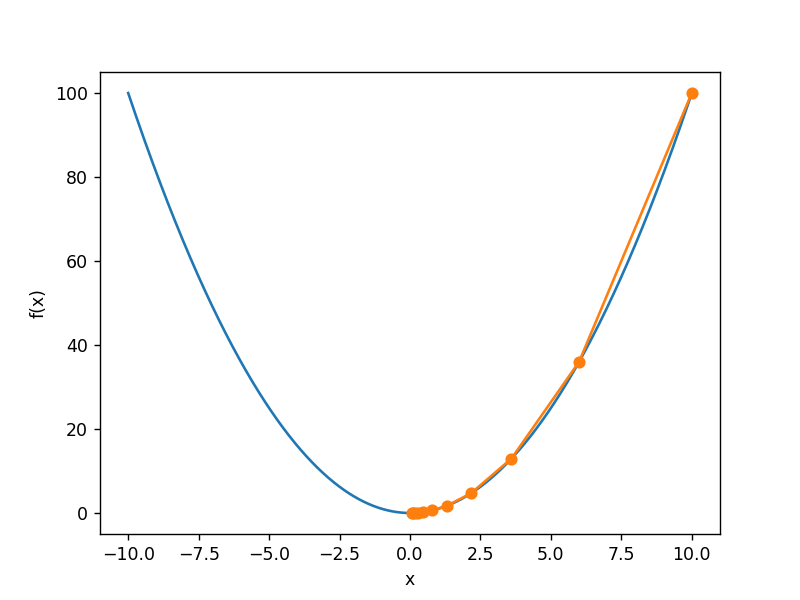

In [10]:
# Plot the updates
def show_trace(res):
    n = max(abs(min(res)), abs(max(res)))
    f_line = np.arange(-n, n, 0.01)
    X = [f_line, res]
    Y = [[f(x) for x in f_line], [f(x) for x in res]]
    fmts = ['-', '-o']
    
    fig = plt.figure()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    for x, y, fmt in zip(X,Y,fmts):
        plt.plot(x, y, fmt)

show_trace(res)

## Learning Rate

The learning rate $\eta$ can be set by the algorithm designer. If we use a learning rate that is too small, it will cause $x$ to update very slowly, requiring more iterations to get a better solution. To show what happens in such a case, consider the progress in the same optimization problem for $\eta = 0.05$. As we can see, even after 10 steps we are still very far from the optimal solution.

epoch 10, x: 3.4867844009999995


<IPython.core.display.Javascript object>


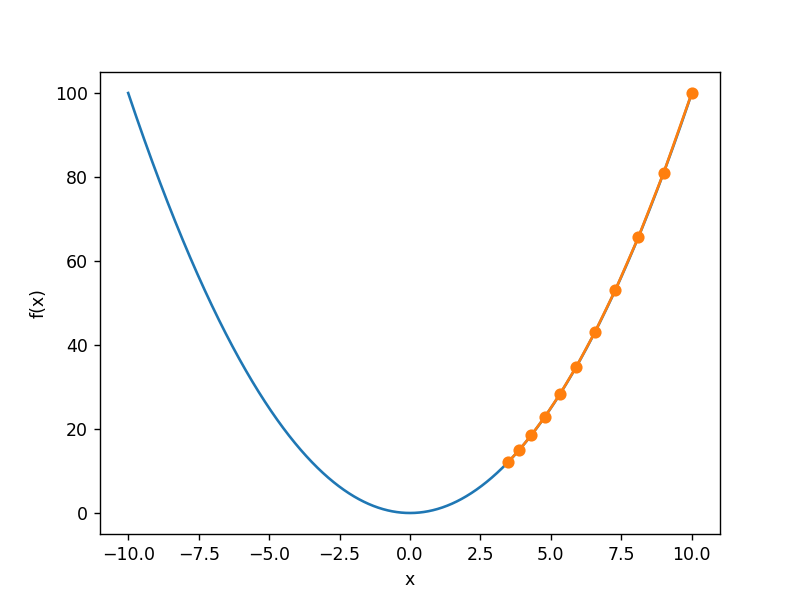

In [11]:
show_trace(gradient_descent(0.05))


Conversely, if we use an excessively high learning rate, $\left|\eta f'(x)\right|$ might be too large for the first-order Taylor expansion formula. That is, the term $O(\eta^2 f'^2(x))$ in the substituted taylor series (second equation above) might become significant. In this case, we cannot guarantee that the iteration of $x$ will be able to lower the value of $f(x)$. For example, when we set the learning rate to $\eta=1.1$, $x$ overshoots the optimal solution $x=0$ and gradually diverges.

epoch 10, x: 61.917364224000096


<IPython.core.display.Javascript object>


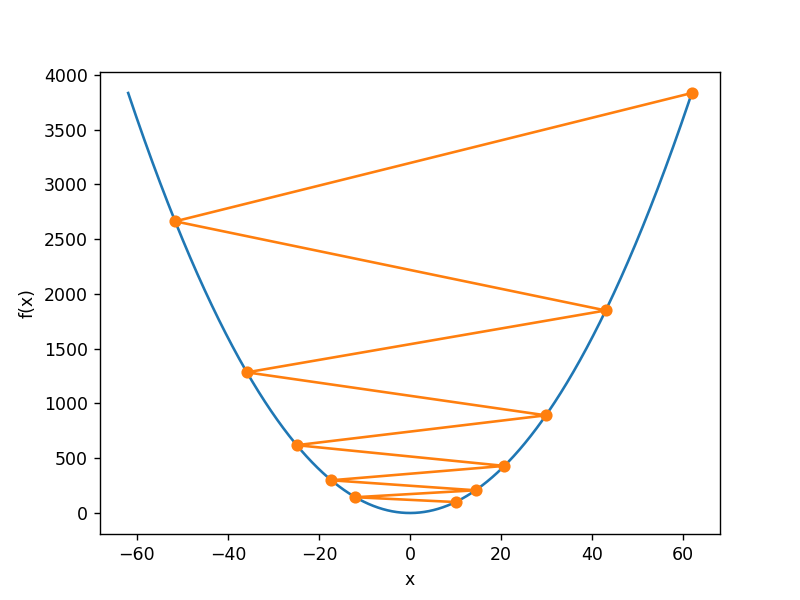

In [12]:
show_trace(gradient_descent(1.1))

## Local Minima

Till now we have seen examples of applying gradient descent to a non-linear convex problem. To illustrate what happens for nonconvex functions consider the case of $f(x) = x \cdot \cos c x$. This function has infinitely many local minima. Depending on our choice of learning rate and depending on how well conditioned the problem is, we may end up with one of many solutions. The example below illustrates how an (unrealistically) high learning rate will lead to a poor local minimum.

epoch 10, x: -1.5281659276350823


<IPython.core.display.Javascript object>


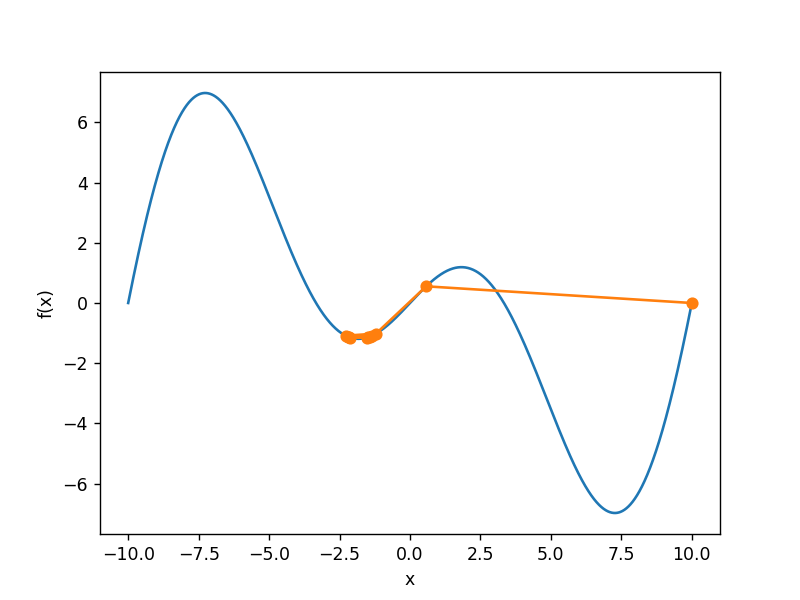

In [13]:
c = 0.15 * math.pi

# objective function
def f(x):     
    return x*math.cos(c * x) 
# its derivative
def gradf(x): 
    return math.cos(c * x) - c * x * math.sin(c * x)

show_trace(gradient_descent(2))

## Multivariate Gradient Descent

Now that have a better intuition of the univariate case, let us consider the situation where $\mathbf{x} \in \mathbb{R}^d$. That is, the objective function $f: \mathbb{R}^d \to \mathbb{R}$ maps vectors into scalars. Correspondingly its gradient is multivariate, too. It is a vector consisting of $d$ partial derivatives:

$$\nabla f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_d}\bigg]^\top.$$

Each partial derivative element $\partial f(\mathbf{x})/\partial x_i$ in the gradient indicates the rate of change of $f$ at $\mathbf{x}$ with respect to the input $x_i$. As before in the univariate case we can use the corresponding Taylor approximation for multivariate functions to get some idea of what we should do. In particular, we have that

$$f(\mathbf{x} + \mathbf{\epsilon}) = f(\mathbf{x}) + \mathbf{\epsilon}^\top \nabla f(\mathbf{x}) + O(|\mathbf{\epsilon}|^2).$$

In other words, up to second order terms in $\mathbf{epsilon}$ the direction of steepest descent is given by the negative gradient $-\nabla f(\mathbf{x})$. Choosing a suitable learning rate $\eta > 0$ yields the prototypical gradient descent algorithm:

$\mathbf{x} \leftarrow \mathbf{x} - \eta \nabla f(\mathbf{x}).$

To see how the algorithm behaves in practice let's construct an objective function $f(\mathbf{x})=x_1^2+2x_2^2$ with a two-dimensional vector $\mathbf{x} = [x_1, x_2]^\top$ as input and a scalar as output. The gradient is given by $\nabla f(\mathbf{x}) = [2x_1, 4x_2]^\top$. We will observe the trajectory of $\mathbf{x}$ by gradient descent from the initial position $[-5,-2]$. We need two more helper functions. The first uses an update function and applies it $20$ times to the initial value. The second helper visualizes the trajectory of $\mathbf{x}$.

Next, we observe the trajectory of the optimization variable $\mathbf{x}$ for learning rate $\eta = 0.1$. We can see that after 20 steps the value of $\mathbf{x}$ approaches its minimum at $[0, 0]$. Progress is fairly well-behaved albeit rather slow.

In [18]:
# objective 
def f(x1, x2):
    return x1 ** 2 + 2 * x2 ** 2

# its gradient
def gradf(x1, x2):
    return (2 * x1, 4 * x2)

# gradient descent in 2D
def gradient_descent_2d(x1, x2, eta): 
    results = [(x1, x2)]
    for i in range(20):
        g1, g2 = gradf(x1, x2)               # compute gradient          
        x1 -= eta * g1                       # update variables along first dims
        x2 -= eta * g2                       # update variables along second dims
        results.append((x1,x2))
        print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
    return results

x1, x2 = -5, -2                           # initialize points
eta = 0.1
results = gradient_descent_2d(x1, x2, eta)

epoch 1, x1 -4.000000, x2 -1.200000
epoch 2, x1 -3.200000, x2 -0.720000
epoch 3, x1 -2.560000, x2 -0.432000
epoch 4, x1 -2.048000, x2 -0.259200
epoch 5, x1 -1.638400, x2 -0.155520
epoch 6, x1 -1.310720, x2 -0.093312
epoch 7, x1 -1.048576, x2 -0.055987
epoch 8, x1 -0.838861, x2 -0.033592
epoch 9, x1 -0.671089, x2 -0.020155
epoch 10, x1 -0.536871, x2 -0.012093
epoch 11, x1 -0.429497, x2 -0.007256
epoch 12, x1 -0.343597, x2 -0.004354
epoch 13, x1 -0.274878, x2 -0.002612
epoch 14, x1 -0.219902, x2 -0.001567
epoch 15, x1 -0.175922, x2 -0.000940
epoch 16, x1 -0.140737, x2 -0.000564
epoch 17, x1 -0.112590, x2 -0.000339
epoch 18, x1 -0.090072, x2 -0.000203
epoch 19, x1 -0.072058, x2 -0.000122
epoch 20, x1 -0.057646, x2 -0.000073


<IPython.core.display.Javascript object>


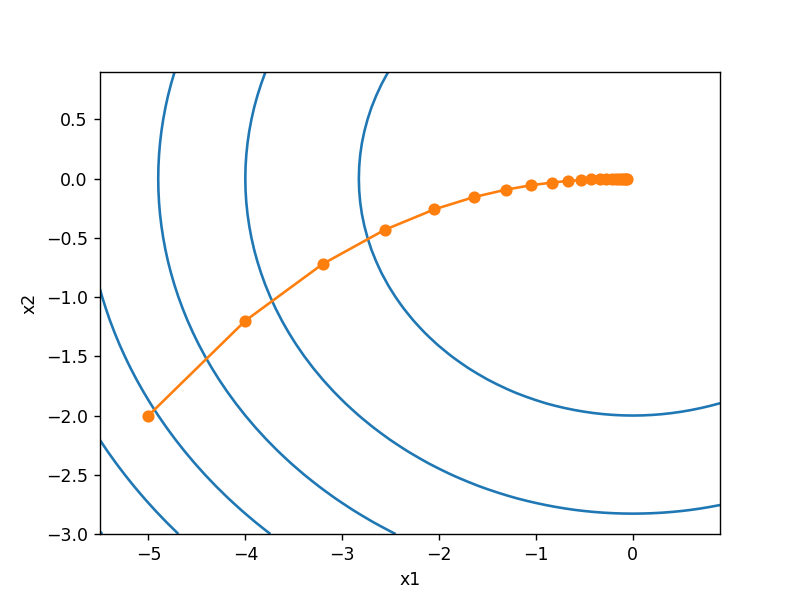

In [19]:
# Plot the results
def show_trace_2d(f, res):
    x1, x2 = zip(*res)
    fig = plt.figure()
    plt.plot(x1, x2, '-o', color='#ff7f0e')
    x1 = np.arange(-5.5, 1.0, 0.1)
    x2 = np.arange(min(-3.0, min(x2) - 1), max(1.0, max(x2) + 1), 0.1)
    x1, x2 = np.meshgrid(x1, x2)
    plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    plt.xlabel('x1')
    plt.ylabel('x2')
    
show_trace_2d(f, results)

## Adaptive Methods

As we could see in the example presented in the Learning Rate section above, getting the learning rate $\eta$ 'just right' is tricky. If we pick it too small, we make no progress. If we pick it too large, the solution oscillates and in the worst case it might even diverge. What if we could determine $\eta$ automatically or get rid of having to select a step size at all? Second order methods that look not only at the value and gradient of the objective but also at its curvature can help in this case.

### Newton's Method

Reviewing the Taylor expansion of $f$ there's no need to stop after the first term. In fact, we can write it as

$$f(\mathbf{x} + \mathbf{\epsilon}) = f(\mathbf{x}) + \mathbf{\epsilon}^\top \nabla f(\mathbf{x}) + \frac{1}{2} \mathbf{\epsilon}^\top \nabla \nabla^\top f(\mathbf{x}) \mathbf{\epsilon} + O(|\mathbf{\epsilon}|^3)$$ 

To avoid cumbersome notation we define $H_f := \nabla \nabla^\top f(\mathbf{x})$ to be the Hessian of $f$. This is a $d \times d$ matrix. For small $d$ and simple problems $H_f$ is easy to compute. For deep networks, on the other hand, $H_f$ may be prohibitively large, due to the cost of storing $O(d^2)$ entries. Furthermore it may be too expensive to compute via backprop as we would need to apply backprop to the backpropagation call graph. For now let us ignore such considerations and look at what algorithm we'd get.

After all, the minimum of $f$ satisfies $\nabla f(\mathbf{x}) = 0$. Taking derivatives of the equation above with regard to $\mathbf{\epsilon}$ and ignoring higher order terms we arrive at

$$\nabla f(\mathbf{x}) + H_f\ \mathbf{\epsilon} = 0 \text{ and hence } \mathbf{\epsilon} = -H_f^{-1} \nabla f(\mathbf{x}).$$

That is, we need to invert the Hessian $H_f$ as part of the optimization problem.

For $f(x) = \frac{1}{2} x^2$ we have $\nabla f(x) = x$ and $H_f = 1$. Hence for any $x$ we obtain $\epsilon = -x$. In other words, a single step is sufficient to converge perfectly without the need for any adjustment! Alas, we got a bit lucky here since the Taylor expansion was exact. Let's see what happens in other problems

epoch 0, x: 8.000182:
epoch 1, x: 6.001523:
epoch 2, x: 4.011398:
epoch 3, x: 2.082542:
epoch 4, x: 0.525763:
epoch 5, x: 0.011786:
epoch 6, x: 0.000000:
epoch 7, x: 0.000000:
epoch 8, x: 0.000000:
epoch 9, x: 0.000000:


<IPython.core.display.Javascript object>


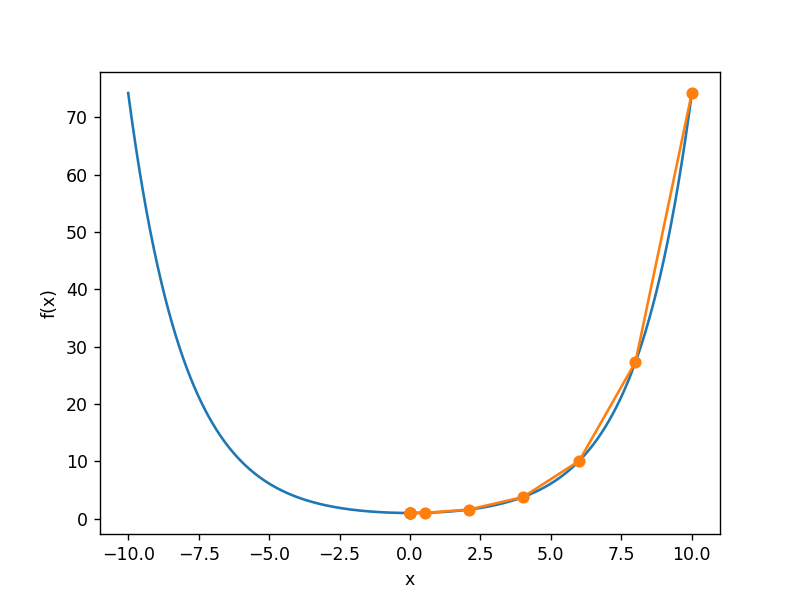

In [27]:
c = 0.5

# objective
def f(x):
    return math.cosh(c * x) 

# its derivative
def gradf(x):
    return c * math.sinh(c * x)

# its hessian
def hessf(x):
    return c**2 * math.cosh(c * x)

# hide learning rate for now
def newton(eta = 1):
    x = 10
    results = [x]
    for i in range(10):
        x -= eta * gradf(x) / hessf(x)
        results.append(x)
        print('epoch %d, x: %f:'% (i, x))
    return results

show_trace(newton())

Now let's see what happens when we have a nonconvex function, such as $f(x) = x \cos(c x)$. After all, note that in Newton's method we end up dividing by the Hessian. This means that if the second derivative is negative we would walk into the direction of increasing $f$. That is a fatal flaw of the algorithm. Let's see what happens in practice.

epoch 0, x: 5.000000:
epoch 1, x: 24.994879:
epoch 2, x: 27.783106:
epoch 3, x: 26.800099:
epoch 4, x: 26.834179:
epoch 5, x: 26.834133:
epoch 6, x: 26.834133:
epoch 7, x: 26.834133:
epoch 8, x: 26.834133:
epoch 9, x: 26.834133:


<IPython.core.display.Javascript object>


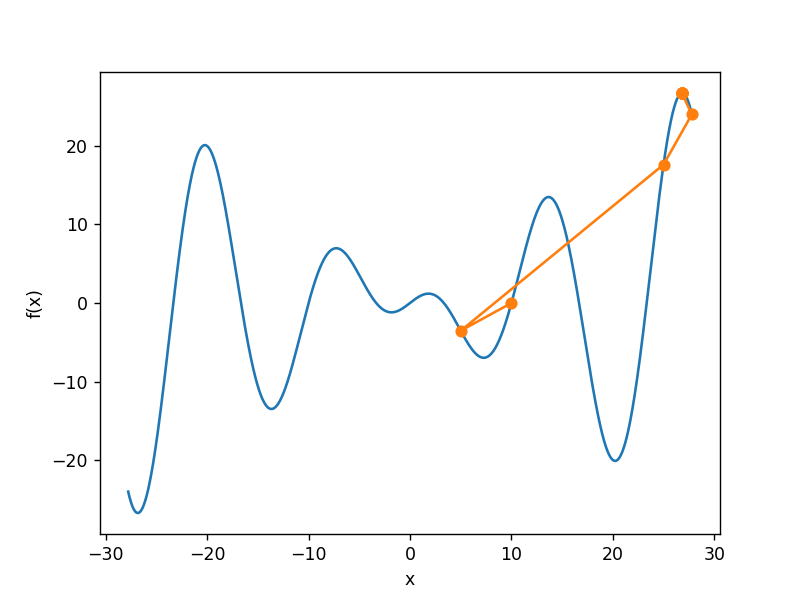

In [28]:
c = 0.15 * math.pi
def f(x):     return x*math.cos(c * x) 
def gradf(x): return math.cos(c * x) - c * x * math.sin(c * x)
def hessf(x): return - 2 * c * math.sin(c * x) - x * c**2 * math.cos(c * x)

show_trace(newton())

This went spectacularly wrong. How can we fix it? One way would be to 'fix' the Hessian by taking its absolute value instead. Another strategy is to bring back the learning rate. This seems to defeat the purpose, but not quite. Having second order information allows us to be cautious whenever the curvature is large and to take longer steps whenever the objective is flat. Let's see how this works with a slightly smaller learning rate, say $\eta = 0.5$. As we can see, we have quite an efficient algorithm.

epoch 0, x: 7.500000:
epoch 1, x: 7.387165:
epoch 2, x: 7.329002:
epoch 3, x: 7.299392:
epoch 4, x: 7.284442:
epoch 5, x: 7.276928:
epoch 6, x: 7.273161:
epoch 7, x: 7.271276:
epoch 8, x: 7.270332:
epoch 9, x: 7.269860:


<IPython.core.display.Javascript object>


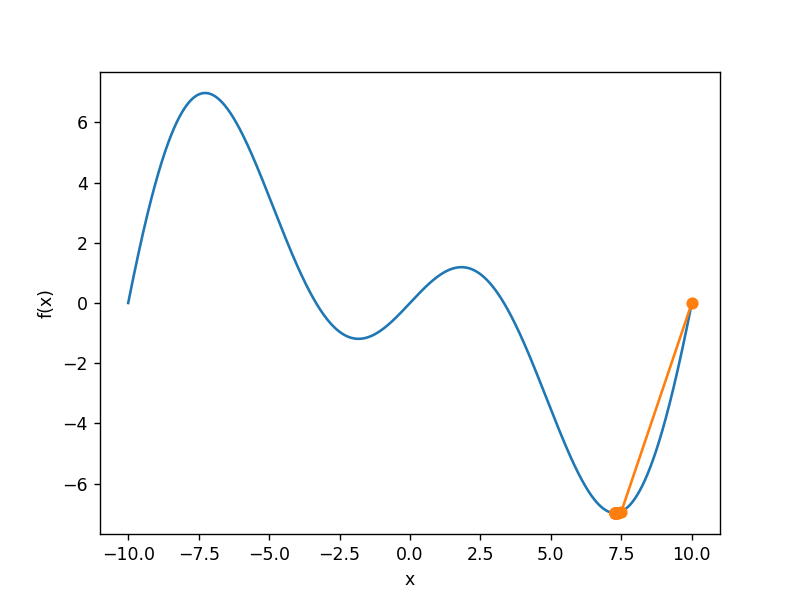

In [29]:
show_trace(newton(0.5))

## Convergence Analysis


We only analyze the convergence rate for convex and three times differentiable $f$, where at its minimum $x^*$ the second derivative is nonzero, i.e. where $f''(x^*) > 0$. The multivariate proof is a straightforward extension of the argument below and omitted since it doesn't help us much in terms of intuition.

Denote by $x_k$ the value of $x$ at the $k$-th iteration and let $ e_k := x_k - x^* $ be the distance from optimality. By Taylor series expansion we have that the condition $f'(x^*) = 0$ can be written as

$$0 = f'(x_k - e_k) = f'(x_k) - e_k f''(x_k) + \frac{1}{2} e_k^2 f'''(\xi_k).$$

This holds for some $\xi_k \in [x_k - e_k, x_k]$. Recall that we have the update $x_{k+1} = x_k - f'(x_k) / f''(x_k)$. Dividing the above expansion by $f''(x_k)$ yields

$$e_k - f'(x_k) / f''(x_k) = \frac{1}{2} e_k^2 f'''(\xi_k) / f'(x_k)$$

Plugging in the update equations leads to the following bound $e_{k+1} \leq e_k^2 f'''(\xi_k) / f'(x_k)$. Consequently, whenever we are in a region of bounded $f'''(\xi_k) / f'(x_k) \leq c$, we have a quadratically decreasing error $e_{k+1} \leq c e_k^2$.

As an aside, optimization researchers call this linear convergence, whereas a condition such as $e_{k+1} \leq \alpha e_k$ would be called a constant rate of convergence. 

Note that this analysis comes with a number of caveats: We don't really have much of a guarantee when we will reach the region of rapid convergence. Instead, we only know that once we reach it, convergence will be very quick. Second, this requires that $f$ is well-behaved up to higher order derivatives. It comes down to ensuring that $f$ doesn't have any 'surprising' properties in terms of how it might change its values.

## Preconditioning

Quite unsurprisingly computing and storing the full Hessian is very expensive. It is thus desirable to find alternatives. One way to improve matters is by avoiding to compute the Hessian in its entirety but only compute the diagonal entries. While this isn't quite as good as the full Newton method, it is still much better than not using it. Moreover, estimates for the main diagonal elements are what drives some of the innovation in stochastic gradient descent optimization algorithms. This leads to update algorithms of the form

$$\mathbf{x} \leftarrow \mathbf{x} - \eta \mathrm{diag}(H_f)^{-1} \nabla \mathbf{x}.$$

To see why this might be a good idea consider a situation where one variable denotes height in milimeters and the other one denotes height in kilometers. Assuming that for both the natural scale is in meters we have a terrible mismatch in parametrizations. Using preconditioning removes this. Effectively preconditioning with gradient descent amounts to selecting a different learning rate for each coordinate.

## Gradient Descent with Line Search

One of the key problems in gradient descent was that we might overshoot the goal or make insufficient progress. A simple fix for the problem is to use line search in conjunction with gradient descent. That is, we use the direction given by $\nabla f(\mathbf{x})$ and then perform binary search as to which steplength $\eta$ minimizes $f(x - \eta \nabla f(\mathbf{x}))$.

This algorithm converges rapidly. However, note that, since each step of the line search would require us to evaluate the objective function on the entire dataset. This is way too costly to accomplish.

## Exercises

1. Experiment with different learning rates and objective functions for gradient descent.
2. Implement line search to minimize a convex function in the interval $[a, b]$.
   - Do you need derivatives for binary search, i.e. to decide whether to pick $[a, (a+b)/2]$ or $[(a+b)/2, b]$.
   - How rapid is the rate of convergence for the algorithm?
   - Implement the algorithm and apply it to minimizing $\log (\exp(x) + \exp(-2*x -3))$.
3. Design an objective function defined on $\mathbb{R}^2$ where gradient descent is exceedingly slow. Hint - scale different coordinates differently.
4. Implement the lightweight version of Newton's method using preconditioning:
   - Use diagonal Hessian as preconditioner.
   - Use the absolute values of that rather than the actual (possibly signed) values.
   - Apply this to the problem above.
5. Apply the algorithm above to a number of objective functions (convex or not). What happens if you rotate coordinates by $45$ degrees?